<a href="https://colab.research.google.com/github/hungrynagini/movie_tag_prediction/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import json
import numpy as np
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from scipy import stats
import datetime

In [5]:
metadata = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ai/movies_metadata.csv')
keywords = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ai/keywords.csv')
plots = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ai/movie_plots.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
keywords

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [0]:
plots = plots[['Release Year','Title','Plot']]
metadata = metadata[['original_title','title','overview','tagline','release_date','id']]
metadata = metadata.apply(lambda x: x[['title','overview','tagline','release_date','id']] if type(x['title']) != float else
                          x[['original_title','overview','tagline','release_date','id']],axis=1)
metadata = metadata.fillna('0000')
plots = plots.fillna('0000')
metadata.release_date = metadata.release_date.apply(lambda x: x[:4])
metadata.release_date = metadata.release_date.astype("int64")

In [0]:
plots = plots.rename(columns={"Title": "title", "Release Year": "release_date"})
metadata.title = metadata.title.apply(lambda x: ''.join(e for e in x if e.isalnum()).lower())
plots.title = plots.title.apply(lambda x: ''.join(e for e in x if e.isalnum()).lower())

In [0]:
# movies = metadata.title
# print(movies[100:150])

In [11]:
metadata = metadata.merge(plots,on=['release_date','title'])
metadata.Plot = metadata.Plot + metadata.overview + metadata.tagline
metadata = metadata.drop(['original_title','release_date','overview','tagline'],axis=1)
metadata.sort_values(by=['title'])

,id,title,Plot
10594,127544,009recyborg,The year is 2013. Skyscraper bombings are happ...
4540,9051,10,During a surprise 42nd birthday party for weal...
7790,7840,10000bc,"At about 10,000 BC, a tribe of hunter-gatherer..."
12593,126757,100bloodyacres,Reg and Lindsay Morgan own and operate a small...
13618,55627,100days,"The film opens with a young woman, Devi (Madhu..."
...,...,...,...
3297,19317,zorrothegayblade,"In 1840s Madrid, Spain, Don Diego de la Vega i..."
9322,74924,zotz,A brilliant but peculiar professor of Ancient ...
10982,52608,zpg,"Set in the future, the Earth has become severe..."
4080,14433,zulu,"In 1879, a communiqué from Lord Chelmsford to ..."


In [0]:
metadata.id = metadata.id.astype("int64")
metadata = metadata.merge(keywords,on=['id'])

In [0]:
# docs = metadata.Plot
# keywords = metadata.keywords
import re
def pre_process(text):
    # lowercase
    text=text.lower()
    #remove tags
    text=re.sub("<!--?.*?-->","",text)
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    return text

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import re
def get_stop_words(stop_file_path,comma):
    """load stop words """
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        if comma:
            stopwords = f.readlines()[0].split(',')
        else:
            stopwords = f.readlines()
        print(len(stopwords))
        stop_set = set(m.strip().lower() for m in stopwords)
        return frozenset(stop_set)
from sklearn.feature_extraction import text
#load a set of stop words
names=get_stop_words("/content/drive/My Drive/Colab Notebooks/ai/stop.txt",True)
my_stop_words = text.ENGLISH_STOP_WORDS.union(names)
surnames=get_stop_words("/content/drive/My Drive/Colab Notebooks/ai/us.txt",False)
my_stop_words = text.ENGLISH_STOP_WORDS.union(surnames)
print(names)
docs = metadata.Plot
ids = metadata.id

5631
88799
frozenset({'edris', 'carola', 'elias', 'deetta', 'reena', 'irish', 'yuette', 'ernestine', 'vennie', 'seeming', 'rolland', 'zenaida', 'abel', 'lindsy', 'myesha', 'into', 'noah', 'hallie', 'lily', 'vannessa', 'merlin', 'jacqulyn', 'garnet', 'an', 'yes', 'darline', 'reba', 'houston', 'allena', 'lachelle', 'sec', 'announce', 'roseanne', 'norman', 'shelba', 'brittany', 'stefania', 'donna', 'johna', 'tara', 'paulene', 'otha', 'elbert', 'dorsey', 'isabell', 'vickey', 'lucy', 'ayana', 'chandra', 'vs', 'adella', 'reva', 'janae', 'catheryn', 'latoria', 'whod', 'shantelle', 'frankie', 'kelsey', 'brittni', 'according', 'celia', 'dinah', 'felisa', 'nerissa', 'regena', 'earlie', 'micheal', 'tonda', 'stella', 'lin', 'jerilyn', 'josue', 'thao', 'len', 'vernita', 'ronnie', 'donn', 'letty', 'without', 'harmony', 'nilsa', 'freida', 'emile', 'von', '3', 'freddie', 'hae', 'jae', 'wesley', 'margret', 'elroy', 'been', 'evelyn', 'evelia', 'caroline', 'noone', 'harley', 'avery', 'jeff', 'thereve', '

In [15]:
metadata

,id,title,Plot,keywords
0,862,toystory,In a world where toys are living things who pr...,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,jumanji,"In 1869, near Brantford, New Hampshire, two br...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,grumpieroldmen,The feud between Max (Walter Matthau) and John...,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,waitingtoexhale,"""Friends are the People who let you be yoursel...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,fatherofthebridepartii,The film begins five years after the events of...,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...
15398,38326,yurisday,Before leaving for a permanent residence in Ge...,[]
15399,98604,cinderella,Masha Krapivina (Kristina Asmus) comes to Mosc...,[]
15400,404604,mom,Biology teacher Devki is vivacious and popular...,"[{'id': 155794, 'name': 'physical abuse'}, {'i..."
15401,84419,houseofhorrors,"Struggling sculptor, Marcel De Lange (Martin K...","[{'id': 9748, 'name': 'revenge'}, {'id': 9826,..."


In [16]:
metadata

,id,title,Plot,keywords
0,862,toystory,In a world where toys are living things who pr...,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,jumanji,"In 1869, near Brantford, New Hampshire, two br...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,grumpieroldmen,The feud between Max (Walter Matthau) and John...,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,waitingtoexhale,"""Friends are the People who let you be yoursel...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,fatherofthebridepartii,The film begins five years after the events of...,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...
15398,38326,yurisday,Before leaving for a permanent residence in Ge...,[]
15399,98604,cinderella,Masha Krapivina (Kristina Asmus) comes to Mosc...,[]
15400,404604,mom,Biology teacher Devki is vivacious and popular...,"[{'id': 155794, 'name': 'physical abuse'}, {'i..."
15401,84419,houseofhorrors,"Struggling sculptor, Marcel De Lange (Martin K...","[{'id': 9748, 'name': 'revenge'}, {'id': 9826,..."


In [0]:
metadata
from sklearn.feature_extraction.text import TfidfVectorizer 
# settings that you use for count vectorizer will go here
# tfidf_vectorizer=TfidfVectorizer(use_idf=True,stop_words=my_stop_words,ngram_range=(1,2))
tfidf_vectorizer=TfidfVectorizer(use_idf=True,stop_words=my_stop_words,min_df=20,ngram_range=(1,2))
# just send in all your docs here
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)
feature_names = tfidf_vectorizer.get_feature_names()

In [0]:
potential_kwords = []
top = 40
leng = tfidf_vectorizer_vectors.shape[0]
for i in range(leng):
#   vec = tfidf_vectorizer_vectors[i]
  first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[i]
# place tf-idf values in a pandas data frame
  df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=feature_names, columns=["tfidf"])
  # df = pd.DataFrame([[vec.T.todense(), feature_names]], columns=["tfidf","tag"])
  # df = pd.DataFrame([[vec.T.todense(), tfidf_vectorizer.get_feature_names()]], columns=["tfidf","tag"])
  # print(df.sort_values(by=["tfidf"],ascending=False)[:20])
  vals = df.sort_values(by=["tfidf"],ascending=False).index
  # leng = len(df.tag.values)
  leng_ = len(vals)
  if leng_ <= top:
    top = leng_
  # print(df.tag.values[:leng] )
  metadata.loc[metadata['id'] == ids[i],'potential_kwords'] = ','.join(vals[:leng_])

In [0]:
feature_names=tfidf_vectorizer.get_feature_names()

In [0]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [0]:
sorted_items=sort_coo(first_vector_tfidfvectorizer.tocoo())
#extract only the top n; n here is 15
keywords=extract_topn_from_vector(feature_names,sorted_items,40)

In [22]:
print("\n=====Doc=====")
print(docs[20])
print("\n===Keywords===")
for k in keywords:
    print(k,keywords[k])


=====Doc=====
Chili Palmer, a loan shark based in Miami, clashes with another mobster, Ray "Bones" Barboni over a stolen coat. They have several confrontations, one of which leaves Barboni with a broken nose. But after Palmer's boss, Momo, dies of a heart attack, he finds himself working for Barboni, whose first order is for Palmer to collect a debt owed by Leo Devoe. Devoe was believed to have been killed in a fatal commercial airliner crash, but had actually gotten off the plane, and failed to re-board. After the plane crash, Devoe's wife identified his personal effects, and the airline offered her a check for $300,000. Chili visits her and discovers Leo is still alive, partying in Las Vegas.
While in Vegas, Palmer picks up a job from a casino manager to collect a debt from B-movie producer Harry Zimm. Palmer goes to Los Angeles and locates Zimm at the home of actress Karen Flores, breaking into her house. Zimm agrees to pay the money he owes in 90 days. Film fan Palmer then pitches

In [23]:
keywordz = metadata.keywords
def try_load(row):
    try:
        jsonparse = json.loads(row)
        return jsonparse
    except Exception as e:
        return []
print(keywordz[20])

[{'id': 395, 'name': 'gambling'}, {'id': 416, 'name': 'miami'}, {'id': 818, 'name': 'based on novel'}, {'id': 8438, 'name': 'job'}, {'id': 9826, 'name': 'murder'}, {'id': 9935, 'name': 'travel'}, {'id': 10391, 'name': 'mafia'}, {'id': 10594, 'name': 'money'}, {'id': 11061, 'name': 'debt'}, {'id': 11578, 'name': 'mobster'}, {'id': 12094, 'name': 'business'}, {'id': 12396, 'name': 'hollywood'}, {'id': 13142, 'name': 'gangster'}, {'id': 14536, 'name': 'crime'}, {'id': 14819, 'name': 'violence'}, {'id': 14964, 'name': 'drug'}, {'id': 33879, 'name': 'producer'}, {'id': 159608, 'name': 'con'}]


In [0]:
keyw = metadata.apply(lambda x: ",".join([i['name']
                          for i in try_load(x.keywords.replace("'","\""))]) if 
                                                         len(x) > 2 and type(x) != float else 0,axis=1)
metadata = metadata.assign(kwords=keyw.values)
metadata = metadata[metadata.kwords != '']

In [25]:
vector = CountVectorizer(tokenizer=lambda x: x.split(","))
tags = vector.fit_transform(metadata['kwords'])
print(tags.shape[1])
tag = vector.get_feature_names()
print(tag[:50])
n = tags.sum(axis=0).A1
result = dict(zip(tag,n))
print(result)
res = pd.DataFrame(list(result.items()),columns=['tag','count'])
res = res.sort_values(['count'],ascending=False)
tag_c = res['count'].values
real_tags = res['tag'].values[:650]
metadata = metadata.drop(['keywords'],axis=1)
for i in real_tags:
  metadata[i] = metadata.kwords.apply(lambda x: 1 if i in x else 0) 
print(real_tags)
metadata

13886
['', ' co', ' england', ' new york city', ' pa', '10th century', '1500s', '15th century', '16th century', '17th century', '18th century', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '19th century', '2000 ad', '20th century', '21st century', '25th century', '2nd century', '3d', 'abandoned', 'abandoned baby', 'abandoned factory', 'abandoned house', 'abandoned mine', 'abandoned ship', 'abandoned woman', 'abandonment', 'abba', 'abduction', 'abilene kansas', 'abolitionist', 'aboriginal', 'aborigine', 'abortion', 'abraham lincoln', 'absent minded', 'absent mindedness', 'abstract', 'absurd humor', 'absurdism', 'abuse', 'abusive father']
{'': 15, ' co': 1, ' england': 1, ' new york city': 17, ' pa': 2, '10th century': 1, '1500s': 1, '15th century': 5, '16th century': 6, '17th century': 7, '18th century': 11, '1910s': 9, '1920s': 7, '1930s': 20, '1940s': 21, '1950s': 21, '1960s': 32, '1970s': 58, '1980s': 22, '1990s': 3, '19th century': 46, '2000 ad': 

,id,title,Plot,potential_kwords,kwords,independent film,woman director,murder,based on novel,musical,duringcreditsstinger,suspense,revenge,violence,love,sport,film noir,sex,police,nudity,biography,world war ii,sequel,friendship,teenager,dystopia,aftercreditsstinger,female nudity,prison,new york,alien,gangster,los angeles,london england,drug,high school,kidnapping,martial arts,marriage,monster,...,crime fighter,royalty,cocaine,chaos,suspicion,tattoo,ambush,suspicion of murder,swamp,diamond,scandal,amusement park,kids and family,duel,coming out,lust,addiction,police detective,smuggling,volcano,bullying,greed,apache,villain,psychologist,hitchhiker,apocalypse,brothel,street shootout,psychic,1950s,1940s,winter,ocean,becoming an adult,mind control,bus,missing person,killer robot,period drama
0,862,toystory,In a world where toys are living things who pr...,"buzz,toys,sid,rocket,truck,duo,launch,knocking...","jealousy,toy,boy,friendship,friends,rivalry,bo...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15602,grumpieroldmen,The feud between Max (Walter Matthau) and John...,"feud,bait,melanie,restaurant,shop,fishing,fran...","fishing,best friend,duringcreditsstinger,old men",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,31357,waitingtoexhale,"""Friends are the People who let you be yoursel...","bernie,let,leave wife,catering,dumping,married...","based on novel,interracial relationship,single...",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11862,fatherofthebridepartii,The film begins five years after the events of...,"annie,baby,wrecking,birth baby,telling,basketb...","baby,midlife crisis,confidence,aging,daughter,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,949,heat,"Neil McCauley, a career criminal, hires Waingr...","criminal,robbery,surveillance,charlene,hotel,a...","robbery,detective,bank,obsession,chase,shootin...",0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15394,413421,phillauri,A young man Kanan (Suraj Sharma) returns to In...,"poetry,poems,tree,spirit,songs,village,brother...","bad luck,spirit",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15396,61385,thetuner,"A former nurse, Liuba, seeking marriage throug...","1987,newspaper,ad,film,assessment,personal,hav...",woman director,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15397,280422,allatonce,Tim and Dan are loser friends from a provincia...,"authority,local,persian,undertake,provincial,b...","robbery,mob",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15400,404604,mom,Biology teacher Devki is vivacious and popular...,"attackers,biology,hotshot,cottage,shattered,ev...","physical abuse,sexual assault",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


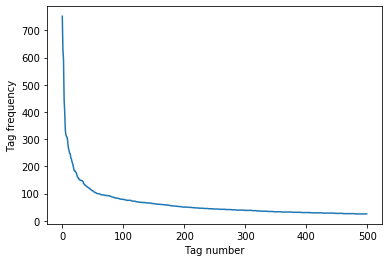

In [26]:
plt.plot(tag_c[:500])
plt.xlabel("Tag number")
plt.ylabel("Tag frequency")
plt.show()

2376     81
722      60
519      50
2920     43
13315    41
         ..
11320     1
13481     1
13484     1
13486     1
5059      1
Name: tag_count, Length: 12861, dtype: int64


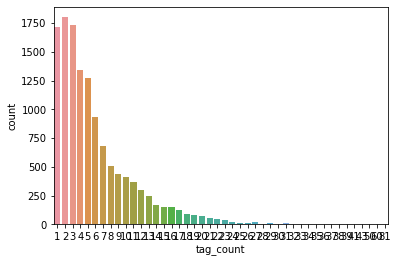

In [27]:
import seaborn as sns
metadata['tag_count'] = metadata.kwords.apply(lambda x: len(x.split(',')))
print(metadata.tag_count.sort_values(ascending=False))
sns.countplot(x=metadata['tag_count'],data=metadata)
# print(metadata.loc[15402])

In [30]:
probability = pd.DataFrame(columns=['tag','keyword','probability','pair'])
for tag in real_tags:
  texts_with_tag = metadata[metadata[tag] == 1]['potential_kwords']
  print(texts_with_tag)
  for text in texts_with_tag:
    for keyword in text.split(','):
      if (probability['pair'] == tag+keyword).any():
        probability[probability['pair'] == tag+keyword] += 1
      probability = probability.append({'tag': tag, 'keyword': keyword, 'probability': 1,'pair':tag+keyword}, ignore_index=True)
#       prob[keyword-tag] += 1

# poten_tags = []
# for movie in test:
#   for keyword in movie:
#     poten_tags += keyword_pairs.sort.get_top_15
# poten_tags = poten_tags.sort.get_top_20



32       relationship,author,unusual,orientation,chapte...
45       amanda,chorus,porn,biological mother,intercour...
60       freddy,trailer,armed,drunk,released prison,dau...
62       jimmy,meg,critical,franchise,pieces,afterlife,...
74       mr,envelope,earrings,motel,75,bookstore,group,...
                               ...                        
15338    soap opera,website,caravan,surf,cancelled,soap...
15356    fantastic,machine,experiment,scientists,effect...
15382    timmy,clown,stripper,characters,protestations,...
15383    underworld,sprawling,infiltration,decay,forms,...
15384    dr,rocket,scientist,topless,forced return,sign...
Name: potential_kwords, Length: 752, dtype: object


TypeError: ignored

In [0]:
all_keywords = metadata.kwords
# print(all_keywords)
all_keywords = [j for i in all_keywords for j in i]
set_k = list(set(all_keywords))
count_k = [[i, all_keywords.count(i)] for i in set_k]
print(count_k)

In [0]:
count_k.sort(key=lambda x: x[1],reverse=True)
print(count_k)

In [0]:
print(len(all_keywords))
print(len(set_k))
print(len([i for i in count_k if i[1] <= 5]))